## Alex's Project


## Pt 1
 - unpack the data and establish what we're working with
 - develop a plan for creating the baseline model
 - prepare data for baseline model
 - create baseline model
 - test baseline model
 

### Unpack the data and establish what we're working with

In [91]:
#Data analysis imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [92]:
#Read housing data into Pandas data frame
df = pd.read_csv("data/kc_house_data.csv")

In [93]:
#investigate first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [94]:
#Look at column data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [95]:
#count non-unqiue entries in the ID column
#represents homes that appear multiple times in our data
df['id'].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

In [96]:
#Finding list of duplicate ID values
df_dupes = df
df_dupes["dup_id"] = df_dupes['id'].duplicated()
df_dupes[df_dupes["dup_id"]==True]['id']

94       6021501535
314      4139480200
325      7520000520
346      3969300030
372      2231500030
            ...    
20165    7853400250
20597    2724049222
20654    8564860270
20764    6300000226
21565    7853420110
Name: id, Length: 177, dtype: int64

In [97]:
duplicate_id_values = list(df_dupes[df_dupes["dup_id"]==True]['id'].values)

In [98]:
#Ivestigating a few duplicate values
df[df['id']==duplicate_id_values[2]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dup_id
324,7520000520,9/5/2014,232000.0,2,1.0,1240,12092,1.0,NaN,NONE,...,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,False
325,7520000520,3/11/2015,240500.0,2,1.0,1240,12092,1.0,NO,NONE,...,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,True


In [99]:
df[df['id']==duplicate_id_values[5]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dup_id
717,8820903380,7/28/2014,452000.0,6,2.25,2660,13579,2.0,NO,NONE,...,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242,False
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,NONE,...,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242,True


Concluding that house ids appear multiple times because homes can be sold multiple times

In [100]:
#looking at measures of central tendancy in the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Identifiers
- ID
    - Ids appear multiple times because homes can be sold multiple times
- zipcode

#### Numeric columns
- bedrooms
    - range (1,34)
- bathrooms
    - range(0.5, 8)
- sqft_living
- sqft_lot
- floors
- sqft_above
- yr_built
- yr_renovated
- sqft_living15

#### Colums with null values
- waterfront
- view
- yr_renovated

#### Non-numeric columns
- date (Date house was sold)
- waterfront (Whether the house is on a waterfront)
- view (Quality of view from house)
- condition (How good the overall condition of the house is)
- grade (Overall grade of the house. Related to the construction and design of the house.)
- sqft_basement (Square footage of the basement)

### Develop a plan for creating the baseline model

#### Investigate correlations of numeric columns and price
Numeric columns offer the simplest starting point for linear regression. Investigating correlation of these columns.

In [101]:
#Investigate correlations of valid numeric columns and price
valid_numeric_columns_df = df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","sqft_lot","floors","sqft_above","yr_built","yr_renovated","sqft_living15"]]

In [102]:
abs(valid_numeric_columns_df.corrwith(valid_numeric_columns_df['price'])).sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot         0.089876
yr_built         0.053953
dtype: float64

In [103]:
((abs(valid_numeric_columns_df.corr())) >= .70)[:1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15
price,True,False,False,True,False,False,False,False,False,False,False


 `'sqft_living'` is a candidate for further investigation based on the absolute value of its correlations with `'price'` being above 0.70



#### Validate assumptions for simple regression 
Validate that our candidates for dependant and independant variables `'sqft_living'` and  `'price'` pass assumptions for linear regression analysis.

  ##### Before running model 
 - Linearity
 ##### After running model
 - Normality of model residals (after running model)
 - Homoscedasticity (after running model)

#### Validate linearity
The relatioinship between `'sqft_living'` and  `'price'` passes our visual linearity test. There appear to be some outliers to investigate in future models that could improve the results.

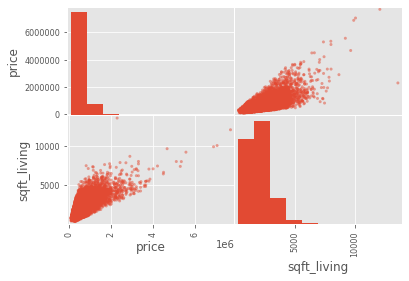

In [104]:
pd.plotting.scatter_matrix(df[['price','sqft_living']]);
plt.show()

#### Run simple regression model on `'sqft_living'` and  `'price'`

In [105]:
from statsmodels.formula.api import ols
simple_model = ols('price ~ sqft_living',df).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:08:38   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

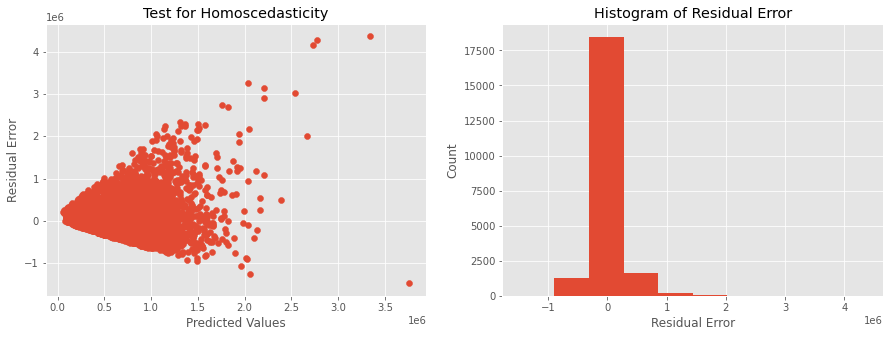

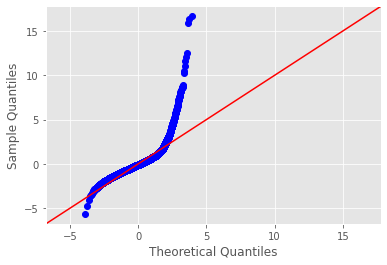

In [122]:
import scipy.stats as stats
simple_model_resid = simple_model.resid
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(x=simple_model.fittedvalues,y=simple_model_resid)
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residual Error")
ax[0].set_title(label="Test for Homoscedasticity")


ax[1].hist(resid)
ax[1].set_xlabel("Residual Error")
ax[1].set_ylabel("Count")
ax[1].set_title(label="Histogram of Residual Error");

plt.style.use('ggplot')
fig = sm.graphics.qqplot(simple_model_resid, dist=stats.norm, line='45', fit=True)

### Analysis of simple regression model

In [121]:
print(f'R-squared {round(simple_model.rsquared,2)}')
print(f'P-Value {simple_model.f_pvalue}')
print(f'Price standard error {round(simple_model.bse,0)[0]}')
print(f'sqft_living coef {round(simple_model.params[1])}')

R-squared 0.49
P-Value 0.0
Price standard error 4410.0
sqft_living coef 281.0


We're confident that we've described a statistically significant relationship between`'sqft_living'` and  `'price'` but our model is pretty biased and doesn't do a very good job predicting home price.

Our tests of validity indicated that there is heteroscedasticity and our errors have a significant rightward skew. Our predictions seem to break down at higher `'sqft_living'` suggesting that we have some outliers to deal with to improve our model.

## Pt 2
 - Improvements to simple model

#### Validate assumptions for improvements to simple regression

 ##### Before running model 
 - Linearity
 - Outliers
 - Normality of variables (not-required) 
 ##### After running model
 - Normality of model residals (after running model)
 - Homoscedasticity (after running model)

### Attempt 1: Remove Outliers from Independant Variable


There's seems to be a lack of linearity between `'sqft_living'` and  `'price'` when `'sqft_living'` is very high potentially because sqft_living is right skewed

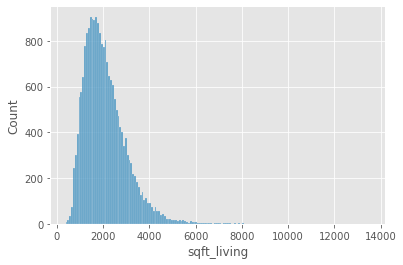

In [109]:
sns.histplot(df['sqft_living']);

In [110]:
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

`'sqft_living'` is normally distributed but there is a right-skew giving us some outliers.
The rule for a high outlier is that if any data point in a dataset is more than Q3 - 3xIQR, it's a high outlier. We will subset our data to only look at data that falls under 3xIQR

In [112]:
#Find our IQR
sqft_living_iqr = df['sqft_living'].quantile(.75)-df['sqft_living'].quantile(.25)
#Find our Q3
sqft_living_Q3 = df['sqft_living'].quantile(.75)

#Multiply IQR by 3 and add to Q3 to establish upper outlier cutoff
sqft_living_upper_outlier_cutoff = (sqft_living_iqr *3) + sqft_living_Q3

print(f' sqft_living_iqr IQR: {sqft_living_iqr}')
print(f' sqft_living_iqr upper outlier cutoff: {sqft_living_upper_outlier_cutoff}')

 sqft_living_iqr IQR: 1120.0
 sqft_living_iqr upper outlier cutoff: 5910.0


In [114]:
#Create a new df with sqft_living upper outliers removed
df_outliers_removed = df[df['sqft_living'] <= sqft_living_upper_outlier_cutoff]
                        
print(f'We removed {len(df["sqft_living"])-len(df_outliers_removed["sqft_living"])} outliers from sqft_living')

We removed 74 outliers from sqft_living


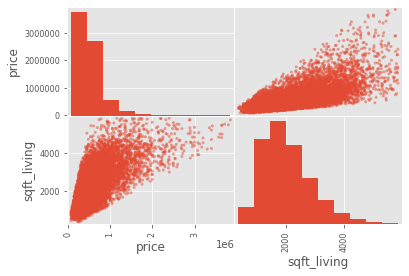

In [115]:
#Checking the distrobution and correlation of the cleaned data. This seems like a stronger relationship.
pd.plotting.scatter_matrix(df_outliers_removed[['price','sqft_living']]);
plt.show()

In [116]:
df_outliers_removed[['price']].corrwith(df_outliers_removed['sqft_living'])

price    0.67861
dtype: float64

In [117]:
refined_model_1 = ols('price ~ sqft_living',df_outliers_removed).fit()
refined_model_1_summary = refined_model_1.summary()
refined_model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 1.837e+04
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:09:43   Log-Likelihood:            -2.9782e+05
No. Observations:               21523   AIC:                         5.956e+05
Df Residuals:                   21521   BIC:                         5.957e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9633.6564   4345.922     -2.217      0.027   -1.82e+04   -1115.326
sqft_living   263.1498      1.942    135.538      0.000     259.344     266.955
==============================================================================
Omnibus:                    11403.148   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156454.040
Skew:                           2.238   Prob(JB):                         0.00
Kurtosis:                      15.426   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

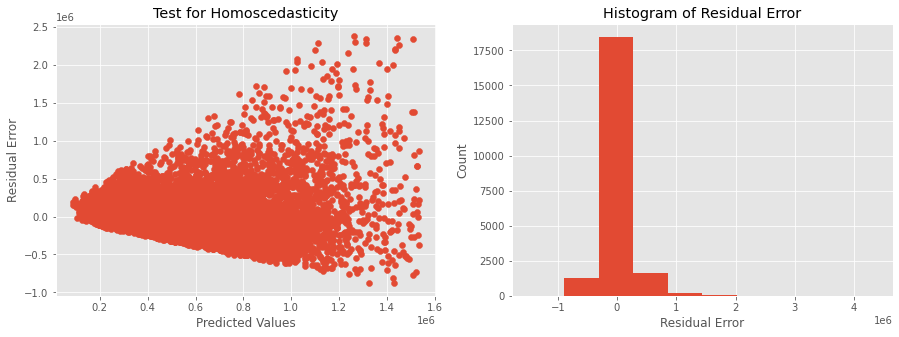

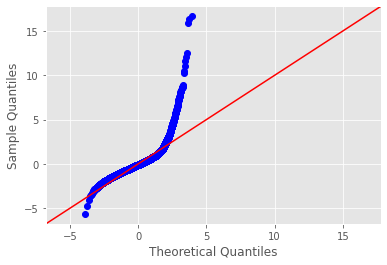

In [124]:
refined_model_1_resid = refined_model_1.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(x=refined_model_1.fittedvalues,y=refined_model_1_resid)
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residual Error")
ax[0].set_title(label="Test for Homoscedasticity")


ax[1].hist(resid)
ax[1].set_xlabel("Residual Error")
ax[1].set_ylabel("Count")
ax[1].set_title(label="Histogram of Residual Error");

plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

#### Attempt 1: Analysis
We failed to improve the model by removing outliers from `"sqft_living"`


### Attempt 2: Log transform our target independant variable

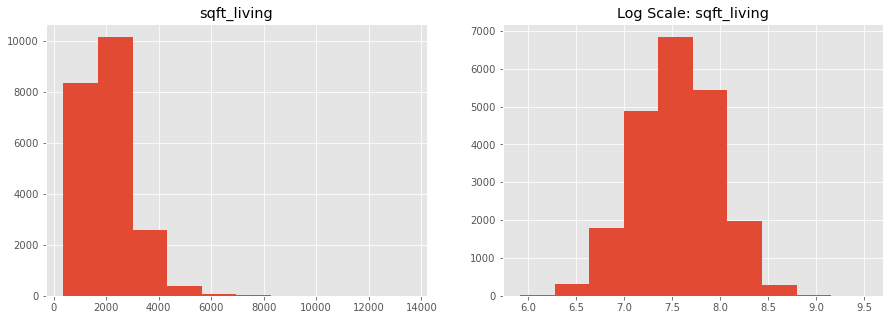

In [136]:
#Log scaling our sqft_living variable makes our independant variable's data more more normally distributed.
sqft_living_log = np.log(df['sqft_living'])
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))
ax1.hist(df['sqft_living'])
ax1.set_title("sqft_living")
ax2.hist(sqft_living_log)
ax2.set_title("Log Scale: sqft_living");